In [1]:
#do this later from admin: !python -m pip install --upgrade pip


# TOC

0. [Imports](#first-bullet)
1. [EDA](#1.0-bullet)
2. [Feature Engineering](#2.0-bullet)
3. [Cleaning](#3.0-bullet)  
 3.1 [Pt 1 - Basic Cleaning](#3.1-bullet)  
 3.2 [Pt 2 - Advanced Cleaning and feature engineering](#3.2-bullet)
4. [Reference and Planning](#4.0-bullet)

# Do not Run All cells - lots of intermittent cleaning included for reference

Jump to Cleanup

In [38]:
#Basic
import pandas as pd
import numpy as np
#Math
import scipy as sp
from random import randint
from math import exp
import operator

#Scraping
import requests
import json

#Youtube Data API Packages: 
from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
from googleapiclient.discovery import build
import argparse
"""
from googleapiclient.errors import HttpError"""

#Modeling
#from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cluster import KMeans
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

#NLP & Text Management
'''from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer'''
import re
from textblob import TextBlob
from wordcloud import WordCloud

#Time analysis
import time
import datetime as dt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [101]:
data = pd.read_csv('./data/clean_data_nocomments_noviews_02.10.18.csv')
df_main = data

# <a class="anchor" id="1.0-bullet"> 1. EDA</a>

In [34]:
df_main.columns

Index(['caption', 'channelTitle', 'commentCount', 'defaultLanguage',
       'definition', 'description', 'dislikeCount', 'duration',
       'favoriteCount', 'licensedContent', 'likeCount', 'publishedAt',
       'regionRestriction', 'tags', 'title', 'vidId', 'viewCount',
       'request_token', 'letter_search', 'contentRating', 'year', 'month',
       'month_day', 'year_day', 'week_day'],
      dtype='object')

In [45]:
df_main.shape

(8694, 25)

In [67]:
print('   mean: ', df_main.viewCount.mean())
print('   median: ', df_main.viewCount.median())
print('   mode: ', df_main.viewCount.mode())

   mean:  53227002.69358178
   median:  3362238.5
   mode:  0    0
dtype: int64


In [77]:
#How skewed are we?
df_main.viewCount.mean() /  df_main.viewCount.median()

15.830823034588946

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


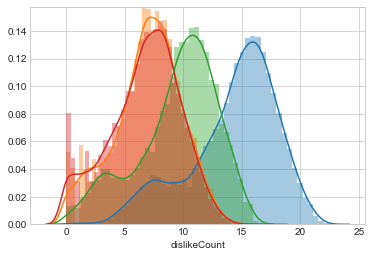

In [44]:
sns.distplot(np.log(df_main[df_main.viewCount>0].viewCount)) #Views
sns.distplot(np.log(df_main[df_main.commentCount>0].commentCount)) #Comments
sns.distplot(np.log(df_main[df_main.likeCount>0].likeCount)) #Likes
sns.distplot(np.log(df_main[df_main.dislikeCount>0].dislikeCount)) #Likes

In [82]:
#Engagement
print('   comment ratio', (df_main.commentCount / df_main.viewCount).median())
print('   dislike ratio', (df_main.dislikeCount / df_main.viewCount).median())
print('   like ratio', (df_main.likeCount / df_main.viewCount).median())

   comment ratio 0.00034203926675335035
   dislike ratio 0.00022929015398251337
   like ratio 0.006713840631370753


In [85]:
#How many of these are over 20 minutes? A lot. 
df_main[df_main.duration>(20*60)].shape[0] / df_main.shape[0]

0.06970324361628709

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


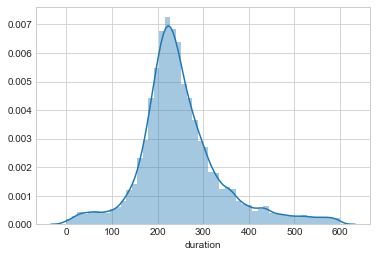

In [42]:
sns.distplot((df_main[df_main.duration<(10*60)].duration))

In [93]:
#Are they interesting?
df_main[df_main.duration>(20*60)]['viewCount'].max()

182653201

In [94]:
# A lot of relaxation stuff here. 
df_main[(df_main.duration>(20*60))&(df_main.viewCount>10000000)].loc[:, ['description', 'title', 'viewCount']]

,description,title,viewCount
38,The extended version of Clair de Lune. \r\r\n\...,Clair de Lune (Extended),21055960
481,Relaxdaily's instrumental background music: sl...,Background Music Instrumentals - relaxdaily - ...,76793517
562,3 hours of beautiful music (tracklist below) b...,3 Hours of Beautiful Music by Peder B. Helland,15990378
661,Subscribe for more classical music: http://bi...,The Best of Beethoven,31932211
1155,Pachelbel's Canon aka Canon in D is the name c...,Canon In D | Pachelbel's Canon | 1 Hour Version,19945987
1325,"Live At the Grand Rex, Paris April 2004, Cesar...",Cesaria Evora Live D'amor 2004 (Complete Concert),16876744
1344,Wolfgang Amadeus Mozart: Requiem in D minor (...,Mozart - Requiem in D minor (Complete/Full) [HD],34548812
1416,The clock is ticking and the world awaits... W...,I’d do it all | BTS: Burn the Stage Ep1,16584409
1547,Música relaxante para acalmar a mente e relaxa...,Música Relaxante - Acalmar a Mente e Relaxar,22912330
1706,★ QUER COLABORAR COM O NOSSO TRABALHO? Doe R$1...,"Música Anti-Depressão e Ansiedade, Equilibrio ...",23586767


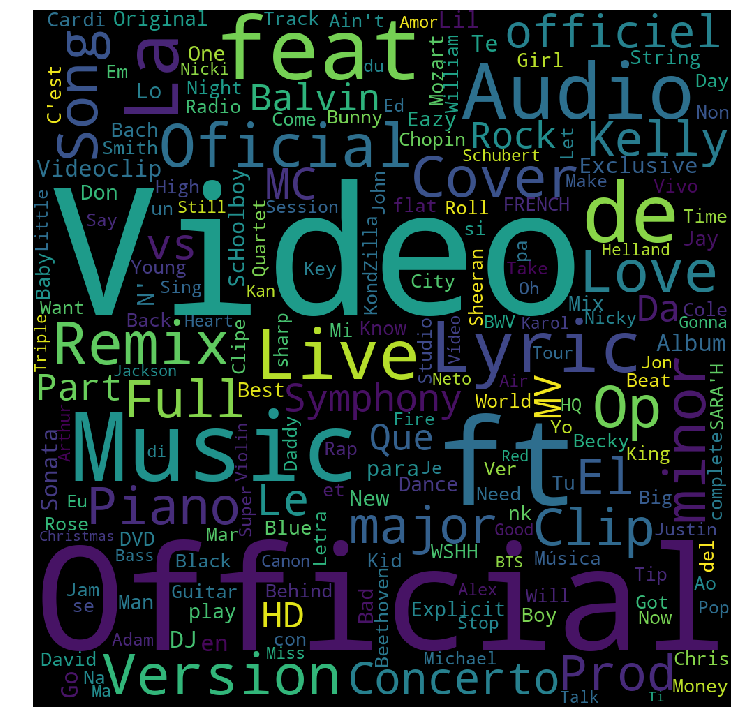

In [114]:
#Title Words
corpus_string1 = ''
for i in range(df_main.shape[0]):
    corpus_string1 = corpus_string1 + df_main.iloc[i]['title']

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string1)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

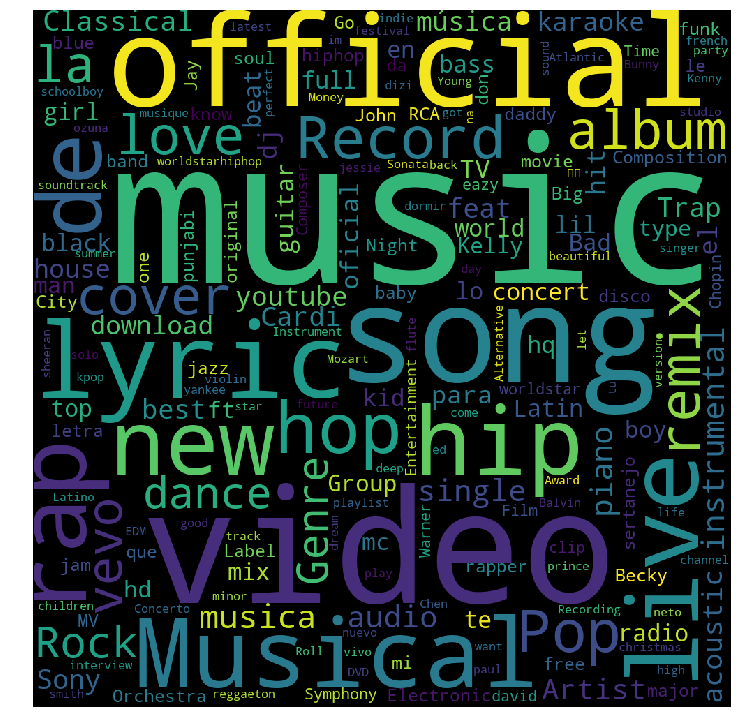

In [115]:
corpus_string2 = ''
for i in range(df_main.shape[0]):
    corpus_string2 = corpus_string2 + str(df_main.iloc[i]['tags'])

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string2)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

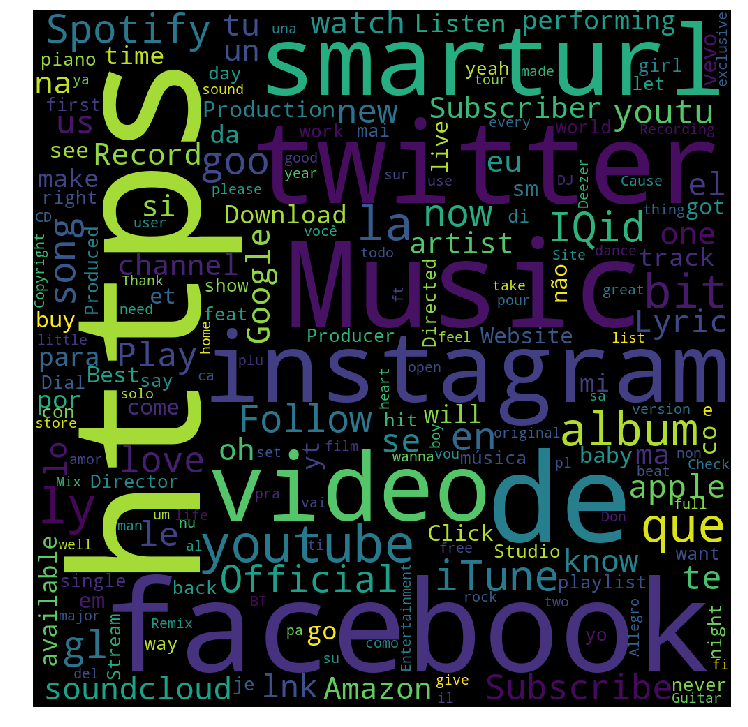

In [116]:
corpus_string3 = ''
for i in range(df_main.shape[0]):
    corpus_string3 = corpus_string3 + str(df_main.iloc[i]['description'])

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string3)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

In [117]:
TextBlob(corpus_string1).sentiment.polarity #Title

0.1242649255397477

In [118]:
TextBlob(corpus_string2).sentiment.polarity #Tags

0.11938258688631741

In [119]:
TextBlob(corpus_string3).sentiment.polarity #Description

0.18659543356966823

In [39]:
#create log features

In [102]:
df_main['view_log'] = df_main['viewCount'].map(lambda x: 0 if x==0 else np.log(x))

In [123]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [121]:
df_main[df_main['year_day']==1]['viewCount'].mean()

8655777.333333334

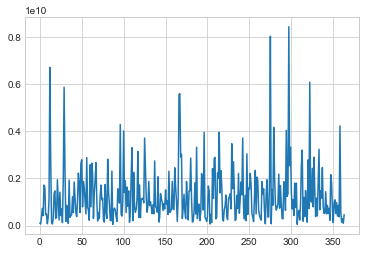

In [146]:
plt.plot([df_main[(df_main['year_day']==i)]['viewCount'].sum() for i in range(1,365)])

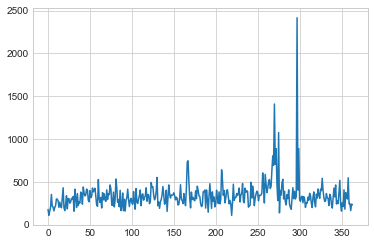

In [144]:
plt.plot([df_main[df_main['year_day']==i]['view_log'].sum() for i in range(1,365)])

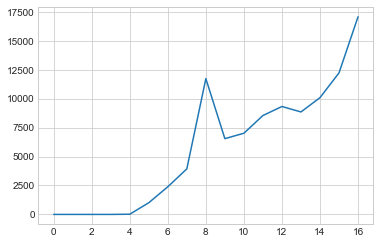

In [141]:
plt.plot([df_main[df_main['year']==i]['view_log'].sum() for i in range(1,18)])

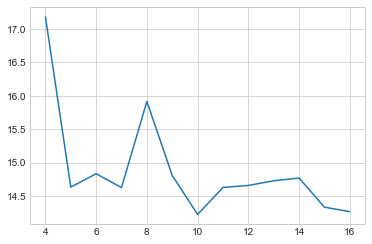

In [143]:
plt.plot([df_main[df_main['year']==i]['view_log'].mean() for i in range(1,18)])
#Something to note - only old videos with heaps of views are stil included in the most relevant search.

In [ ]:
#Next look at published at 

# <a class="anchor" id="2.0-bullet"> 2. Feature Engineering</a>

To Do:
* Description
 * Sentiment
 * CVEC predictions
 * Overall word count
* Tags
 * Sentiment
 * CVEC predictions
 * Num tags
* Title
 * Sentiment
 * CVEC predictions
 * feat / ft. 
 * Which letters
 * Length
* Measures
 * Log features
  * commentCount, 
  * dislikeCount, 
  * favoriteCount, 
  * likeCount
  * viewCount: view_log


Done: 

# <a class="anchor" id="3.0-bullet"> 3. Cleanup</a>

## <a class="anchor" id="3.1-bullet">3.1 Nulls and Stuff</a>

Note: This section was completed immediately after the main data pull was completed, where df_big_videos was still in memory.  
Progress was saved and continued in 3.2. 

In [154]:
#Save point 1
#df_new.to_csv('./data/alphabet_pull_init_01.10.18.csv', index=False)

## <a class="anchor" id="3.2-bullet">3.2 Interpretation and Advanced Cleaning</a>


### Duration Converstion

In [115]:
df_temp = pd.DataFrame(df_data.loc[:, 'duration'])
#Regex testing
#Hours
test_string1 = 'PT3H5M1S'
print('    3=', int((re.findall('PT(.+)[01234567890]?H', test_string1))[0]))

#Minutes
test_string2 = 'PT32H21M1S'
print('    21=', int(re.findall('[A-Z]([01234567890]*?M)', test_string2)[0].replace('M', '')))

#Seconds
test_string2 = 'PT23H12S'
print('    12=', int(re.findall('[A-Z]([01234567890]*?S)', test_string2)[0].replace('S', '')))

    3= 3
    21= 21
    12= 12


In [116]:
#Find digits in string and create column to hold
df_temp['hours'] = df_temp['duration'].apply(lambda x: 
                                             0 if 'H' not in x else int((re.findall('PT(.+)[01234567890]?H', 
                                                                                    x))[0]))
df_temp['minutes'] = df_temp['duration'].apply(lambda x: 
                                             0 if 'M' not in x else int(re.findall('[A-Z]([01234567890]*?M)',
                                                                                   x)[0].replace('M', '')))
df_temp['seconds'] = df_temp['duration'].apply(lambda x: 
                                             0 if 'S' not in x else int(re.findall('[A-Z]([01234567890]*?S)',
                                                                                   x)[0].replace('S', '')))
df_temp['seconds_tot'] = df_temp['seconds'] + df_temp['minutes'] * 60 + df_temp['hours'] * 60 * 60

df_temp.head()

,duration,hours,minutes,seconds,seconds_tot
0,PT5M4S,0,5,4,304
1,PT6M3S,0,6,3,363
2,PT4M39S,0,4,39,279
3,PT3M54S,0,3,54,234
4,PT3M20S,0,3,20,200


In [131]:
df_data['duration'] = df_temp['seconds_tot'] #seems agressive to look too deeply into this.

### Publish Date

In [118]:
df_data.loc[:, ['publishedAt']] = pd.to_datetime(df_data.publishedAt)

In [119]:
df_data['year'] = df_data.publishedAt.dt.year - 2000
df_data['month'] = df_data.publishedAt.dt.month
df_data['month_day'] = df_data.publishedAt.dt.day
df_data['year_day'] = df_data.publishedAt.dt.dayofyear
df_data['week_day'] = df_data.publishedAt.dt.dayofweek

### Get Dummies 
 * definition, (0 for sd, 1 for hd)
 * licensedContent (map)
 * Caption (map)

In [121]:
df_data.loc[:, ['definition']] = df_data.definition.map({'sd':0, 'hd':1})

In [124]:
df_data.loc[:, ['licensedContent']] = df_data.licensedContent.map({False:0, True:1})

In [126]:
df_data.loc[:, ['caption']] = df_data.caption.map({False:0, True:1})

### Drop, convert

In [158]:
cols_to_drop = ['categoryId', 'channelId', 'dimension', 'liveBroadcastContent', 'projection']
#Changing this since I am destroying detail for the last columns, and for the drops
df_clean = df_data.loc[:, [col for col in df_data.columns if col not in cols_to_drop]]
df_clean['regionRestriction'] = df_clean['regionRestriction'].fillna(0).map(lambda x: 1 if x!= 0 else 0)
df_clean['contentRating'] = df_clean['contentRating'].fillna(0).map(lambda x: 1 if x!= 0 else 0)

In [165]:
meta_cols = ['vidId','request_token', 'letter_search', ]
cols_to_hold = ['defaultLanguage', 'regionRestriction','contentRating' ] #These are pretty sparse
cols_for_analysis = [  'duration', 'licensedContent', 'definition',   #other 
                     'caption', 'channelTitle','tags', 'title', 'description', #text 
                     'publishedAt', 'year', 'month','month_day', 'year_day', 'week_day',  #dates
                     'viewCount','likeCount','dislikeCount', 'favoriteCount','commentCount', #Results
                    ]


In [166]:
len(cols_to_hold) + len(cols_for_analysis) + len(meta_cols) == len(df_clean.columns)

True

In [167]:
[col for col in df_clean.columns if col not in meta_cols and col not in cols_to_hold and col not in cols_for_analysis]

[]

In [168]:
df_data.to_csv('./data/alphabet_pull_init_02.10.18.csv', index=False)
df_clean.to_csv('./data/clean_data_nocomments_noviews_02.10.18.csv', index=False)

# <a class="anchor" id="4.0-bullet"> 4.0 Reference and Planning</a>

In [ ]:
# all views over 400M https://www.youtube.com/playlist?list=PLirAqAtl_h2r5g8xGajEwdXd3x1sZh8hC

https://www.youtube.com/results?filters=video&lclk=video&search_query=a%7Cb%7Cc%7Cd%7Ce%7Cf%7Cg%7Ch%7Ci%7Cj%7Ck%7Cl%7Cm%7Cn%7Co%7Cp%7Cq%7Cr%7Cs%7Ct%7Cu%7Cv%7Cw%7Cx%7Cy%7Cz%7C1%7C1%7C2%7C3%7C4%7C5%7C6%7C7%7C8%7C9%7C0&search_sort=video_view_count


YouTube Search_list filtering parameters (sort_method):
* date – Resources are sorted in reverse chronological order based on the date they were created.
* rating – Resources are sorted from highest to lowest rating.
* relevance – Resources are sorted based on their relevance to the search query. This is the default value for this parameter.
* title – Resources are sorted alphabetically by title.
* videoCount – Channels are sorted in descending order of their number of uploaded videos.
* viewCount – Resources are sorted from highest to lowest number of views. For live broadcasts, videos are sorted by number of concurrent viewers while the broadcasts are ongoing.

## Columns Decisions
* Convert 
 * Duration x
 * PublishedAt X
* Get dummies: 
 * definition, (0 for sd, 1 for hd)
 * licensedContent (map)
 * Caption (map)
* Drop:
 * Projection, 
 * Dimension
 * 3d movies,
 * livebroadcast
 * CategoryID
 * channelID (already have title, which has text!!)
 * LiveBroadCastContent
* Leave in for EDA, but anticipate dropping during most analysis (basically stuff that might be interesting)
 * Region restriction should be dropped until modeling - consider bringing this back later
 * ContentRating - insignificant but interesting
 * Could look at channelTitle
 * request_token
 * letter_search
 * defaultLanguage, (might be better as 1 / 0 for set / not set. leave for model)

# Anticipated future data gathering
* Top 10 comment strings
* View Count by date
* 